## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [6]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [14]:
collword = 'tenker'

In [39]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500

In [8]:
korpus = nb.book_urn(author="Hjort%vigdis", period=(1960, 2020), limit=500)
len(korpus)

61


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2009051404036,"Hjorth, Vigdis",dikt til mormor,1990
1,2014061206108,"Hjorth, Vigdis",Hva er det med mor,2009
2,2012121206273,"Hjorth, Vigdis",Snakk til meg,2010
3,2009042004056,"Hjorth, Vigdis",Hysj,1997
4,2014030506013,"Hjorth, Vigdis",Sandnes City,2010
5,2009052704021,"Hjorth, Vigdis",Jørgen + Anne er sant,2003
6,2008021304083,"Hjorth, Vigdis",Ubehaget i kulturen,1995
7,2015021106095,"Hjorth, Vigdis",Tredve dager i Sandefjord,2012
8,2014061205060,"Hjorth, Vigdis",Jørgen + Anne er sant,2011
9,2010112308044,"Hjorth, Vigdis",Tungekysset ; og Drømmen,1990


In [10]:
nb.urn_concordance(word='tenker', urns=korpus)

"dikt til mormor, Hjorth, Vigdis, 1990",- Jeg,tenker,på selskapet . Jeg vil
"dikt til mormor, Hjorth, Vigdis, 1990",Jeg vet nok hva du,tenker,!
"dikt til mormor, Hjorth, Vigdis, 1990",- Hva,tenker,du på for tiden da
"dikt til mormor, Hjorth, Vigdis, 1990",- Du,tenker,så klart . Jeg skjønner
"dikt til mormor, Hjorth, Vigdis, 1990",", - at når du",tenker,stygt om meg tenker du
"Hva er det med mor, Hjorth, Vigdis, 2009","mot stjernene , når jeg",tenker,på hvor stort det er
"Hva er det med mor, Hjorth, Vigdis, 2009","hatt før , og de",tenker,"seg om , det finnes"
"Hva er det med mor, Hjorth, Vigdis, 2009",roper på katten og jeg,tenker,på naboene som hører henne
"Hva er det med mor, Hjorth, Vigdis, 2009","på henne , hva hun",tenker,", ser jeg henne ikke"
"Hva er det med mor, Hjorth, Vigdis, 2009",Når jeg,tenker,på hvor stort det er
"Snakk til meg, Hjorth, Vigdis, 2010",", tenkte jeg , nå",tenker,"jeg ikke slik lenger ,"


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [15]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [16]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [20]:
small.head(20)

,0
",",1203
.,844
på,588
hun,553
det,446
og,404
jeg,354
ikke,293
han,263
er,216


In [19]:
large.head(20)

,0
",",2201
.,1605
hun,878
på,865
det,833
og,757
ikke,582
jeg,509
er,506
han,427


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [21]:
delta = pd.DataFrame()

In [22]:
delta['small'] = small[0]
delta['large'] = large[0]

In [23]:
delta['ratio'] = small[0]/large[0]

In [24]:
#delta['log'] = np.log(delta['ratio'])

In [25]:
#delta['score'] = delta['ratio'] * delta['log']

In [41]:
delta[(delta['small'] > 1) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
nervøsitet,3,3,1.000000
ære,2,2,1.000000
presser,2,2,1.000000
åpen,2,2,1.000000
tause,2,2,1.000000
...,...,...,...
At,8,13,0.615385
må,39,64,0.609375
alt,14,23,0.608696
seg,144,237,0.607595


In [63]:
tot = nb.frame(nb.totals(50000),'tot')

In [27]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",1203,2201,0.546570
.,844,1605,0.525857
og,404,757,0.533686
!,30,87,0.344828
?,147,287,0.512195


In [66]:
delta_ref = nb.frame_sort(nb.frame(delta['small']/tot['tot']))

In [67]:
delta_ref.head(20)

,0
Hulda,0.000488
sovner,0.000338
Ihlen,0.000337
Kvist,0.000321
igrunnen,0.000320
Åja,0.000276
Rike,0.000211
kjærester,0.000195
Arnold,0.000172
pensjonatet,0.000154


In [29]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [30]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [31]:
delta_max.head(20)

,small,large,ratio
skrive,9,10,0.900000
Hva,59,66,0.893939
forstår,8,9,0.888889
inni,8,9,0.888889
),7,8,0.875000
sovner,19,22,0.863636
merker,12,14,0.857143
litt,12,14,0.857143
annen,11,13,0.846154
hele,48,57,0.842105


Forskjellen på der hvor alle ordene befinner seg i det mindre vinduet. De fylles ikke på etter hvert som vinduet øker i størrelse.

In [42]:
delta_const.head(30)

,small,large,ratio
rådyret,4,4,1.0
dyrene,4,4,1.0
best,4,4,1.0
dritt,4,4,1.0
vinkjøleren,4,4,1.0
tregere,4,4,1.0
fortrøstningsfullt,4,4,1.0
veistøvet,4,4,1.0
erotikk,4,4,1.0
bekreftet,4,4,1.0


In [44]:
print(', '.join(delta_max.head(50).index))

skrive, Hva, forstår, inni, ), sovner, merker, litt, annen, hele, ringe, heller, svarer, ny, hender, tilbake, ofte, p, morgenen, ligner, Pelle-Ragnar, tok, tiden, Bjørn, døden, umiddelbart, spørre, Arnold, tankene, først, kvinne, kroppen, stygt, plass, langsomt, snart, søndagen, te, saker, øynene, Kanskje, sånn, Ida, hvordan, flere, ;, jo, etterpå, Hulda, lenger


In [45]:
print(', '.join(delta_const.head(50).index))

rådyret, dyrene, best, dritt, vinkjøleren, tregere, fortrøstningsfullt, veistøvet, erotikk, bekreftet, blafrende, drosje, fjernsynsprogrammer, lyset, vaskemaskinen, dynen, frukttrær, flommer, forklar, vinduet, urettferdighet,, tenk, Urimeligheter, Femte, blikk, dengang, deltagerne, vente, lite, selvfølgelig, uendelig, begjære, trengs, tilfelle, følelsen, gatene, dødelige, cd-er, uttrykk, forlengelse, brevet, gardinene, bro, bryllupssangene, døende, fars, åpent, båten, tettere, seint


# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

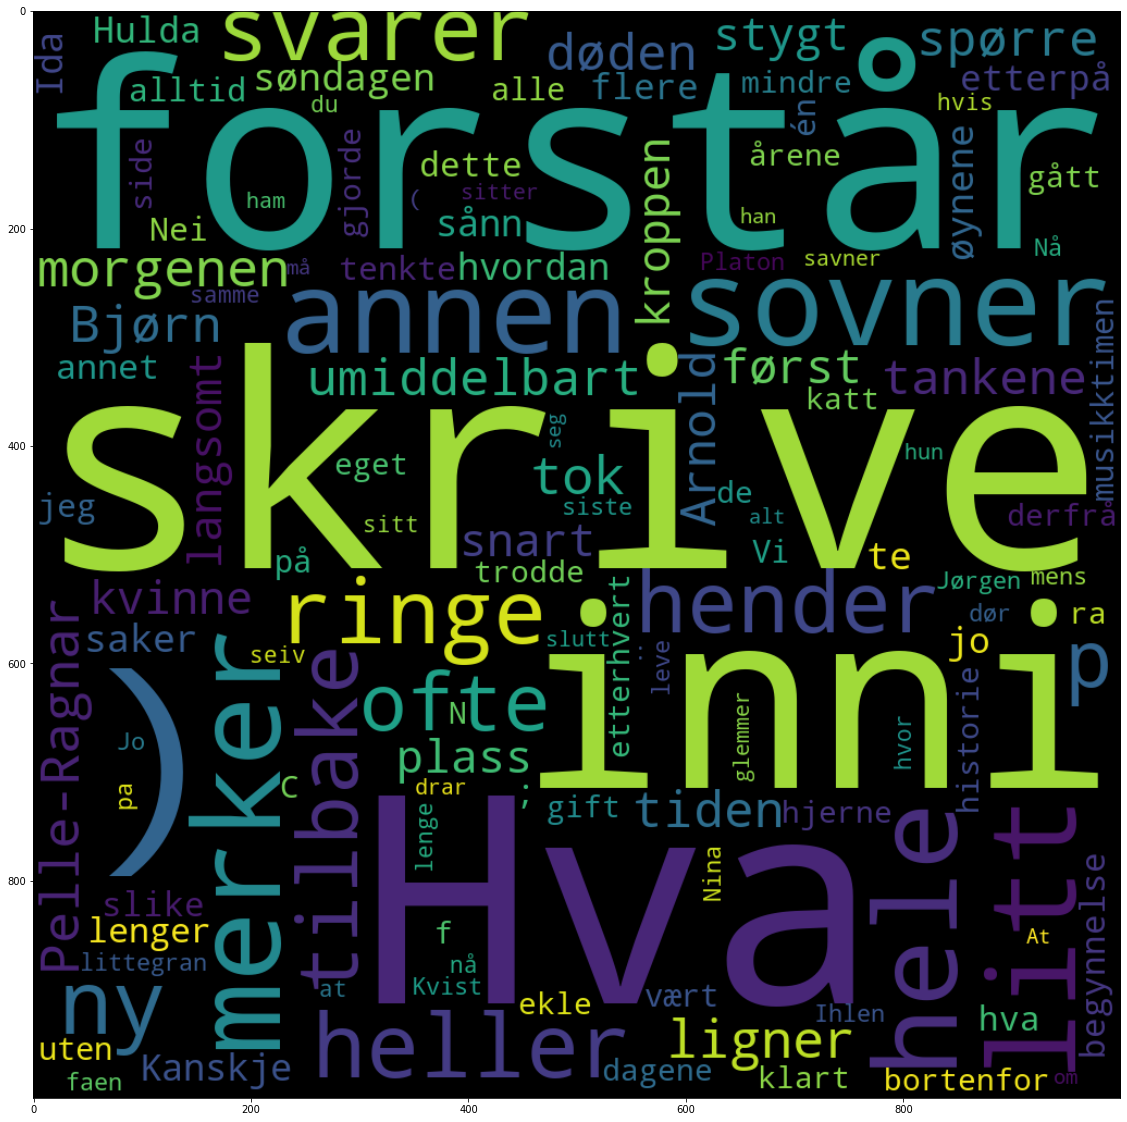

In [35]:
nb.cloud(nb.frame(delta_max.ratio))

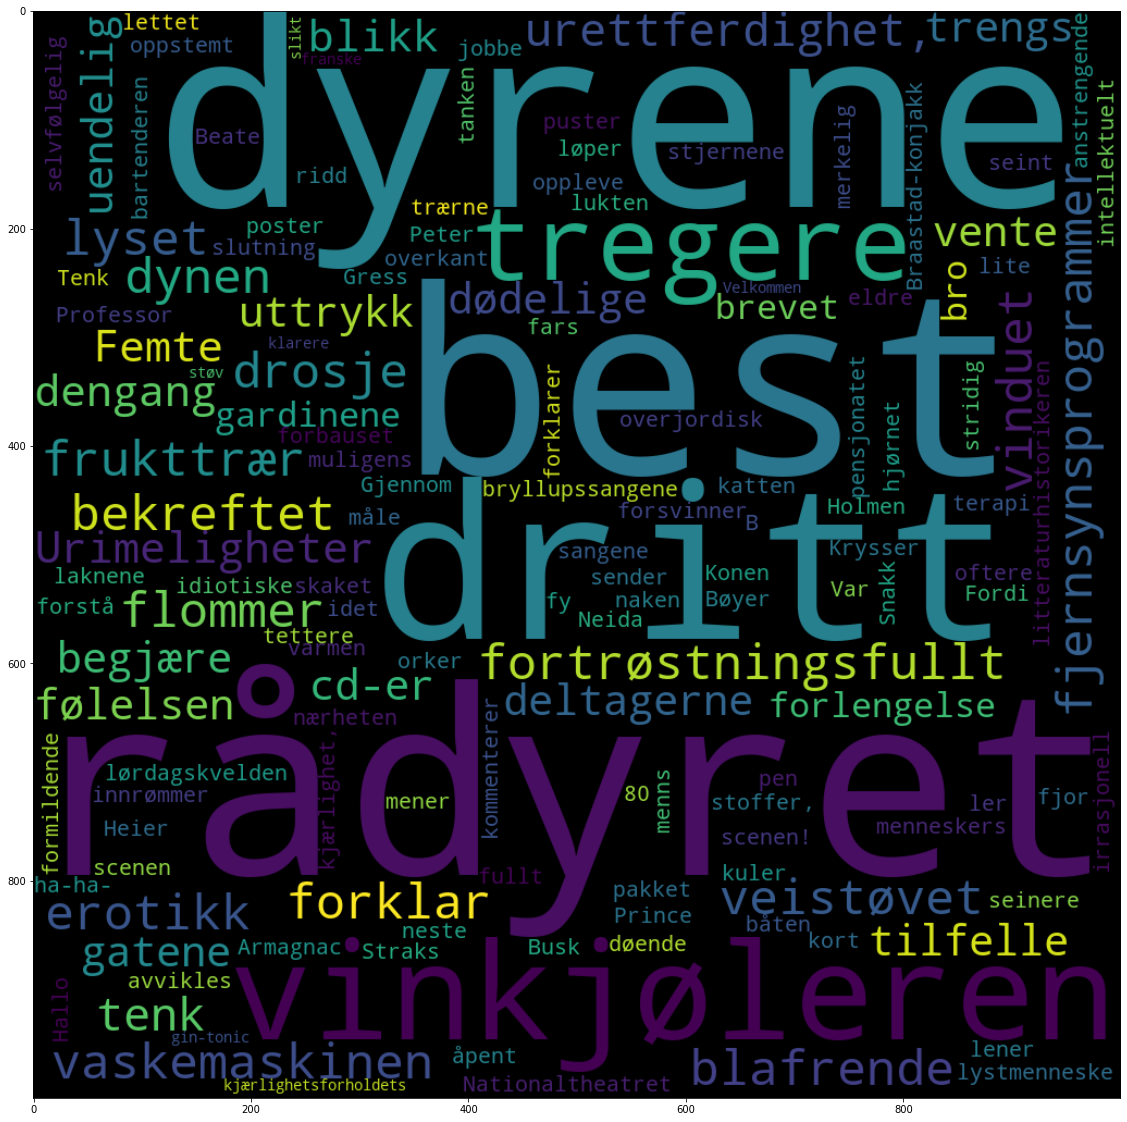

In [36]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))